-----------------------------------**Load Modules**--------------------------------

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

------------------------------------**Prepare/collect data**--------------------

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
drive_path = '/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Training/'

path_contents = os.listdir(drive_path)

classes = {'no_tumor': 0, 'pituitary_tumor': 1}


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
np.unique(Y)

array([0, 1])

In [ ]:
pd.Series(Y).value_counts()


1    827
0    395
dtype: int64

In [ ]:
X.shape

(1222, 200, 200)

----------------------------------------------------**Visualize data**------------------------------------------

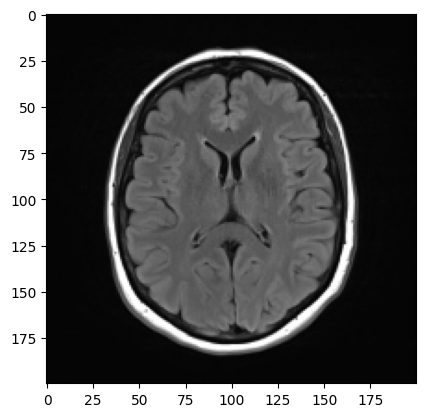

In [ ]:
plt.imshow(X[0], cmap='gray')

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

##Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


##Feature Selection PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


##Train Model


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [ ]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

------------------------------------**Evaluation**-----------------------------------------------------

In [ ]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Testing Score: 0.9714285714285714


In [ ]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9907881269191402
Testing Score: 0.9714285714285714


------------------------------------------**Prediction**--------------------------------------------



In [ ]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

(array([ 24,  49,  86, 138, 166, 184, 238]),)

In [ ]:
pred[24]

0

In [ ]:
ytest[24]

1

--------------------------------**TEST MODEL**----------------------------------


In [ ]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

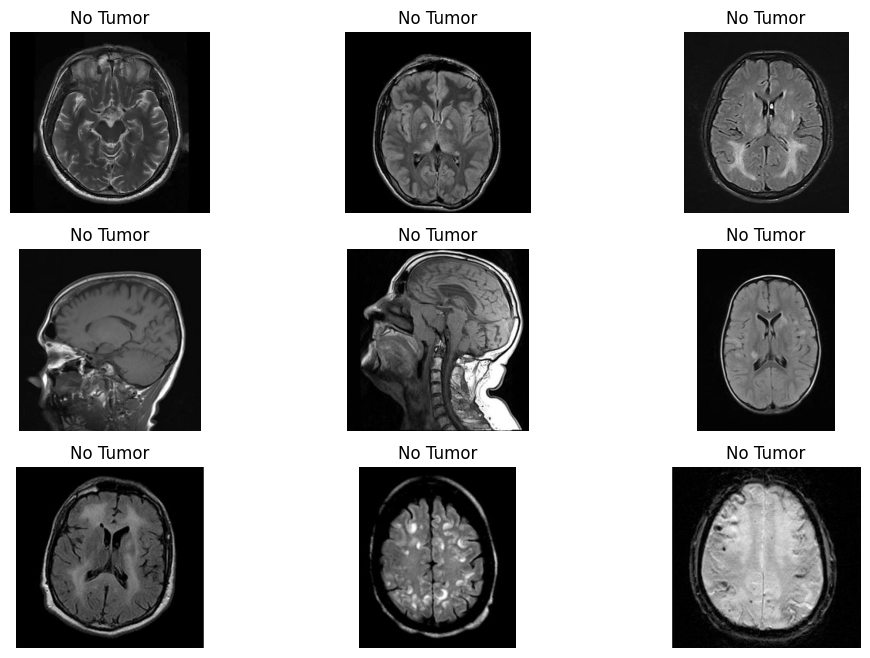

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

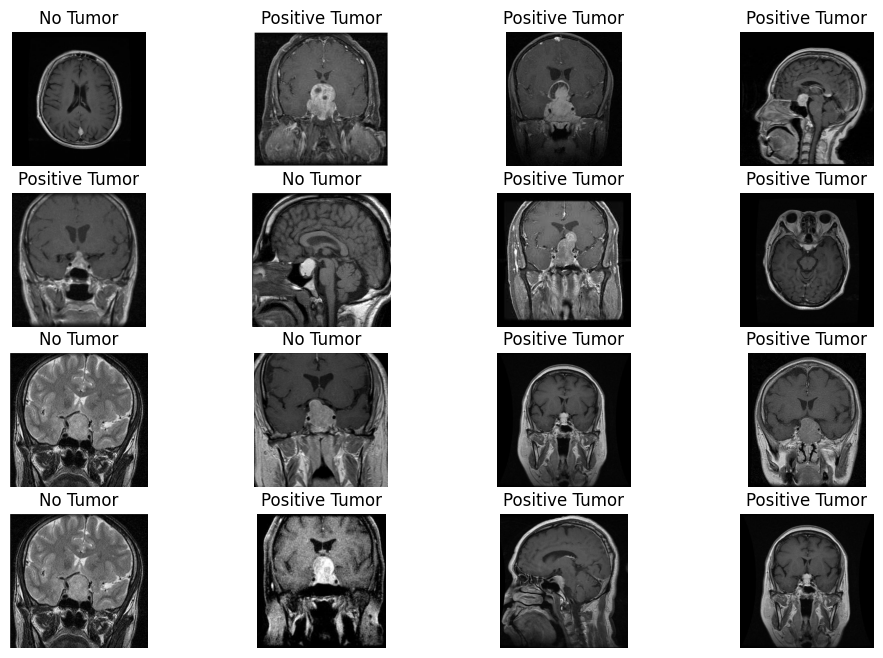

In [ ]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/')
c=1
for i in os.listdir('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/drive/MyDrive/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (200,200))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

**IMPORT IMAGES**

Saving image(6).jpg to image(6) (1).jpg


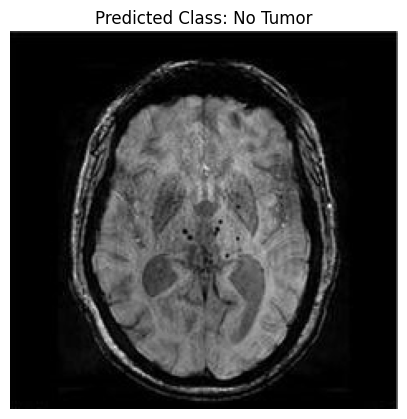

In [ ]:
from google.colab import files
uploaded = files.upload()
uploaded_filename = list(uploaded.keys())[0]
img = cv2.imread(uploaded_filename, 0)

img_resized = cv2.resize(img, (200, 200))
img_normalized = img_resized.reshape(1, -1) / 255
prediction = sv.predict(img_normalized)

predicted_class = dec[prediction[0]]
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()
